curve_0.png
curve_1.png
curve_2.png
curve_3.png
curve_4.png
curve_5.png


KeyboardInterrupt: 

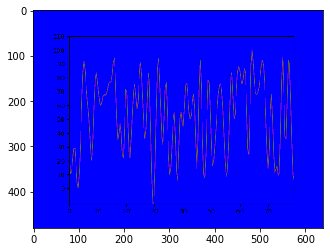

In [1]:
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
import shutil
data_path = "/media/queahren/DATA/testData/测试数据"
image_path = data_path + '/result/'

save_gray = data_path + "/HSV/"
y_data_path = data_path + "/Y_Data/"
save_enhance_mask_path = data_path + "/enhance/"

base_dir = data_path + "/images/"

def fun4(name1):  # name1: curve_3.txt  name = curve_3_mask.txt
    try:
        with open(y_data_path + name1.split('.')[0] + ".txt", "r") as f:
            file = f.readlines()
            for line in file:
                line = line.strip("\n")  # 去除末尾的换行符
            file[0].strip("\n")
            file[0] = file[0].split(")")[0]
            file[0] = file[0].split("(")[1]
            x0_pixel = float(file[0].split(",")[1])
        return x0_pixel
    except:
        print("cannot find this txt ")


pictups = []
for name in os.listdir(base_dir):
    index = name.split('_')[1].split('.')[0]
    if name.split('_')[0] == "curve":
        pictups.append((int(index), name))

pictups.sort(key=lambda tup: tup[0])

for index, imgname in pictups:
    
#     imgname = "curve_9.png"
    print(imgname)
    maskname = imgname.split('.')[0] + "_mask.png"
    
    img = cv2.imread(base_dir + imgname) 
    HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    plt.imshow(HSV_img)
    HSV_img_array = np.asarray(HSV_img) 
    shape = HSV_img_array.shape
#     print(shape)
    cv2.imwrite(save_gray + imgname, HSV_img)
    
    mask_img = Image.open(image_path + maskname)
    mask_img_array = np.asarray(mask_img) 
    shape = mask_img_array.shape
    
    cnt = 0
    h = 0
    for i in range(0, shape[1]):  # shape[0]行总数  shape[1]是列总数
        for j in range(0, shape[0]):
            if mask_img_array[j, i] > 0:
                h += HSV_img_array[j, i, 0]
                cnt += 1
    avg_h = h/cnt
#     print(avg_h)
    
    h, w = shape[0:2]
    mymask = np.zeros((h,w),dtype=img.dtype)            
    
    x0_pixel = fun4(imgname)
    
    for i in range(0, shape[1]):  # shape[0]行总数  shape[1]是列总数
        for j in range(0, shape[0]):
            if abs(HSV_img_array[j, i, 0] - avg_h) < 20 and HSV_img_array[j, i, 1] > 30 and HSV_img_array[j, i, 2] > 46:
                mymask[j, i] = 255
    
    mean, std = cv2.meanStdDev(mymask)
    if mean < 3:
        continue
    
    flag = True
    for i in range(int(x0_pixel)-2, 0, -1):  # shape[0]行总数  shape[1]是列总数
        for j in range(0, shape[0]):
            if mymask[j, i] > 0:
                flag = False
                break
    if flag:
        cv2.imwrite(save_enhance_mask_path + maskname, mymask)
    

  